# Sales Data Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the Sales Data
df = pd.read_csv("p1_salesdata.csv")

In [3]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [4]:
# Check for duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
185945    False
185946    False
185947    False
185948    False
185949    False
Length: 185950, dtype: bool

In [5]:
df.shape

(185950, 11)

In [6]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
# Removing irrelevant columns
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# EDA for Sales Data

In [9]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB
None


In [10]:
# Compute descriptive statistics of the dataset
print(df.describe())

            Order ID  Quantity Ordered     Price Each          Month  \
count  185950.000000     185950.000000  185950.000000  185950.000000   
mean   230417.569379          1.124383     184.399735       7.059140   
std     51512.737110          0.442793     332.731330       3.502996   
min    141234.000000          1.000000       2.990000       1.000000   
25%    185831.250000          1.000000      11.950000       4.000000   
50%    230367.500000          1.000000      14.950000       7.000000   
75%    275035.750000          1.000000     150.000000      10.000000   
max    319670.000000          9.000000    1700.000000      12.000000   

               Sales           Hour  
count  185950.000000  185950.000000  
mean      185.490917      14.413305  
std       332.919771       5.423416  
min         2.990000       0.000000  
25%        11.950000      11.000000  
50%        14.950000      15.000000  
75%       150.000000      19.000000  
max      3400.000000      23.000000  


## Sales Trends Analysis

In [11]:
# Total Quantitiy of products ordered
df["Quantity Ordered"].sum()

209079

In [12]:
# Total No. of products 
df["Product"].nunique()

19

In [13]:
# Calculate total sales
df["Sales"].sum()

34492035.97

In [14]:
# The total quantity ordered by each city
City_Ordered = df.groupby("City")["Quantity Ordered"].sum()
City_Ordered.nlargest()

City
 San Francisco    50239
 Los Angeles      33289
 New York City    27932
 Boston           22528
 Dallas           16730
Name: Quantity Ordered, dtype: int64

In [15]:
# The total Sales by each city
City_Sales = df.groupby("City")["Sales"].sum()
City_Sales.nlargest()

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
Name: Sales, dtype: float64

In [16]:
# Total Sales for each product
Product_Sales = df.groupby('Product')['Sales'].sum()

In [17]:
# Get top 10 products by sales
Product_Sales.nlargest(10)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64

In [18]:
# Get bottom 10 products by sales
Product_Sales.nsmallest(10)

Product
AAA Batteries (4-pack)        92740.83
AA Batteries (4-pack)        106118.40
Wired Headphones             246478.43
USB-C Charging Cable         286501.25
Lightning Charging Cable     347094.15
LG Dryer                     387600.00
LG Washing Machine           399600.00
20in Monitor                 454148.71
Vareebadd Phone              827200.00
27in FHD Monitor            1132424.50
Name: Sales, dtype: float64

In [19]:
# Best selling product
df.groupby('Product')['Quantity Ordered'].sum().nlargest()

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

In [20]:
# Sales per year
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Date' column to datetime format
df['year'] = pd.DatetimeIndex(df["Order Date"]).year
year = df.groupby("year")
year["Sales"].sum()

year
2019    34483365.68
2020        8670.29
Name: Sales, dtype: float64

In [21]:
# Sales per Month
monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales.nlargest()

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
Name: Sales, dtype: float64

In [22]:
# Highest Quantity Ordered per Hour
Hour = df.groupby("Hour")["Quantity Ordered"].sum()
Hour.sort_values(ascending=False)

Hour
19    14470
12    14202
11    14005
18    13802
20    13768
13    13685
14    12362
10    12308
21    12244
17    12229
16    11662
15    11391
22     9899
9      9816
23     7065
8      7002
7      4556
0      4428
6      2810
1      2619
5      1493
2      1398
4       937
3       928
Name: Quantity Ordered, dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Total Quantity of products ordered by each city')

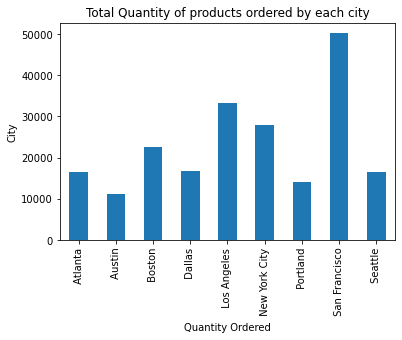

In [23]:
City_Ordered.plot(kind="bar")
plt.xlabel("Quantity Ordered")
plt.ylabel("City")
plt.title("Total Quantity of products ordered by each city")

Text(0.5, 1.0, 'Total Sales by each city')

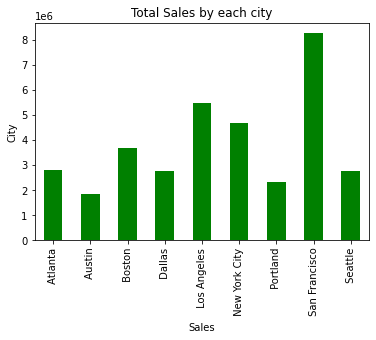

In [24]:
City_Sales.plot(kind="bar", color="green")
plt.xlabel("Sales")
plt.ylabel("City")
plt.title("Total Sales by each city")

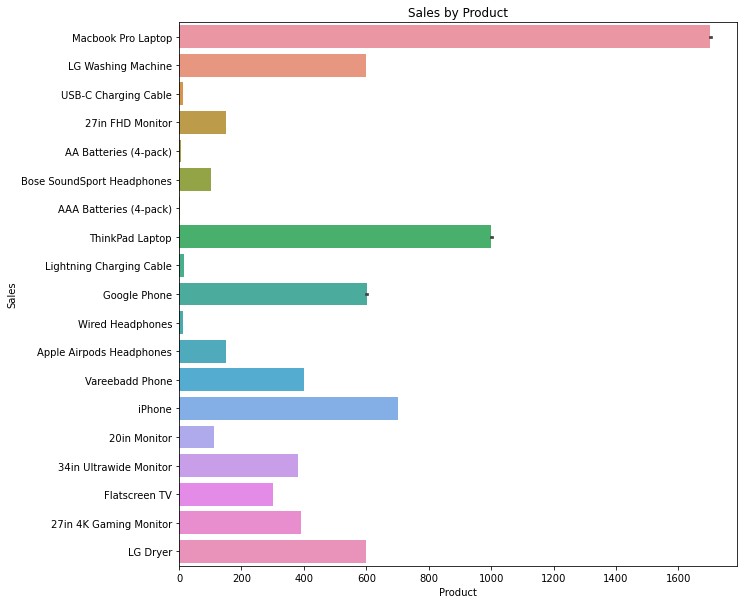

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x='Sales', y='Product', data=df)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product')
plt.show()

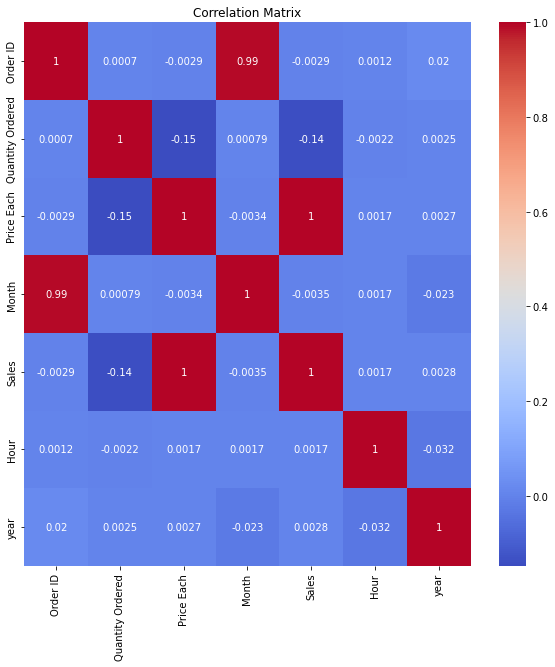

In [26]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

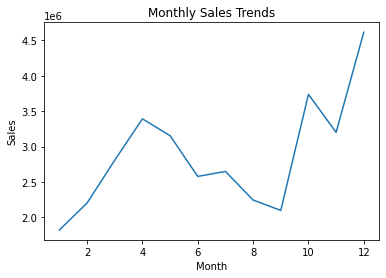

In [27]:
# Plot monthly sales trends
plt.plot(monthly_sales)  
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends')
plt.show()

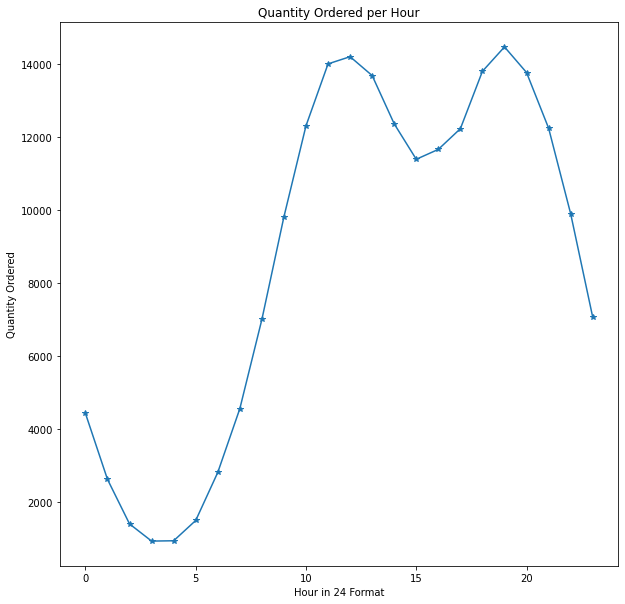

In [28]:
plt.figure(figsize=(10,10))
Hour.plot(kind="line", marker="*")  
plt.xlabel('Hour in 24 Format')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Hour')
plt.show()